Name: Paola Granados

Labpartner(s): Destiny Martinez 

In [42]:
#import statements go here
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Class 7.1

Hope everyone is recovering from the freeze. Being in survival mode is stressful! I am going to attemt to be easy on you this week. As announced, there are no labs assigned last week, we are just taking a pass on those. I may have to shuffle some of the later material in the schedule, TBD.

I am having special office hours tomorrow, Tuesday 2-3 on the class zoom channel. I am asking those of you who are behind on any labs to check in with me and make a plan. If you can't make that time, let's schedule another one ASAP. Please note that you cannot miss these early labs and pass the class, and the material builds, so it is critical we get you caught up.


This week we are going to do more plotting, learn about functions, and apply this to your datasets. Next Monday we will have present your work day again, see below for details. Hopefully at this point the material is building to the point where it is not all forein and you will feel a bit more confident.

Originally we had introduction of Zotero and a CV assignment on the schedule for this week, but I'm pushing that until next week so we have less new material to deal with this week.

# Warmups 7.1

**W.1** Go through 1.4.1.5 Indexing and Slicking in the scipy lecture notes, up to the exercises, which you will do on Wednesday. http://scipy-lectures.org/intro/numpy/array_object.html#id2

In [2]:
#create an array 
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
#reversing a sequence 
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [6]:
#2_D array; diag fills out the digonal inside array with sepcified range 
b = np.diag(np.arange(3))
b

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [7]:
#indexing 
b[2,1]=10 #set number in third row, second column equal to 10
b

array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0, 10,  2]])

In [9]:
b[1] #index for the second row 

array([0, 1, 0])

In [10]:
#slicing 
a[2:9:3]#start:end:step

array([2, 5, 8])

In [11]:
#slicing 
a[:4]#select up to element 4

array([0, 1, 2, 3])

In [12]:
a[1:3]

array([1, 2])

In [13]:
a[::2]#step of 2? starts with 0

array([0, 2, 4, 6, 8])

In [14]:
a[3:]

array([3, 4, 5, 6, 7, 8, 9])

In [15]:
#combining and assignment 
a[5:]=10
a

array([ 0,  1,  2,  3,  4, 10, 10, 10, 10, 10])

# Lecture 7.1

### Agenda:

- The Parable Of Finding Nemo, or How To Do The Seemingly Impossible
- Questions
- Functions!


### Questions

### Functions

Functions are super-useful for doing repetative tasks. You have been using pre-defined functions constantly, when you define arrays, make a plot, or analyse data. Now you are going to learn to write your own.

For more information on functions and documenting:
- http://scipy-lectures.org/intro/language/functions.html?highlight=functions
- https://realpython.com/documenting-python-code/


Basic syntax:

In [16]:
# first you define the function

def function_name():
    # some code that does something
    print('Inside the function')

In [17]:
# then you call the function
function_name()

Inside the function


Note that defined funtions show up using whos

In [18]:
whos

Variable        Type        Data/Info
-------------------------------------
a               ndarray     10: 10 elems, type `int32`, 40 bytes
b               ndarray     3x3: 9 elems, type `int32`, 36 bytes
function_name   function    <function function_name at 0x000001E72B094C10>
np              module      <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd              module      <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt             module      <module 'matplotlib' from<...>matplotlib\\__init__.py'>


That's a really useless function, let's make a better one.

In [19]:
# usually you want to pass a varible of some sort to the function to manipulate

def circle_area(radius):
    area = 3.14*radius**2
    return area   # the return statement means that the function will return that variable

In [20]:
circle_area(5)

78.5

What happens if I don't add the required input?

In [21]:
circle_area()

TypeError: circle_area() missing 1 required positional argument: 'radius'

What happens if I omit the return statement?

In [24]:
def circle_area2(radius):
    area = 3.14*radius**2

In [26]:
circle_area2(5)
#nothing is returned

How do I save the function output to a variable?

Does the area variable inside the function exist outside of it?

Note I also could have made my function like this:

In [ ]:
def circle_area4(radius):
    return 3.14*radius**2

In [ ]:
circle_area4(5)

### Parsing for bad imput

Note my above function will work even if the input is negative, which is not reasonable. So I probably want to include a statement that checks if the input is weird.

In [31]:
def circle_area5(radius):
    if radius <= 0:
        print("Error: Radius needs to be positive")
        return #exit the function 
    
    return 3.14*radius**2

In [28]:
circle_area5(-3)

Error: Radius needs to be positive


In [29]:
circle_area5(3)

28.26

### Using packages within functions

We can also have import statements within a function, but this can slow the function down if the package is not loaded already

In [33]:
def circle_area6(radius):
    import numpy as np
    if radius <= 0:
        print("Error: Radius needs to be positive")
        return #exit the function 
    return np.pi*radius**2

In [34]:
circle_area6(3) # note this is a much more accurate

28.274333882308138

We can have the function inputs have pre-defined default values, so that if you don't pass a variable it will use the default

In [35]:
def circle_area7(radius = 3):
    import numpy as np #import numpy so we can use the more exact value of pi
    
    return np.pi*radius**2

In [36]:
circle_area7() # no argument given, so uses radius = 3 by default

28.274333882308138

Is numpy imported outside the function? Let's check

In [37]:
whos
#numpy has not be imported outside 

Variable        Type        Data/Info
-------------------------------------
a               ndarray     10: 10 elems, type `int32`, 40 bytes
b               ndarray     3x3: 9 elems, type `int32`, 36 bytes
circle_area     function    <function circle_area at 0x000001E72B094EE0>
circle_area2    function    <function circle_area2 at 0x000001E72B0949D0>
circle_area5    function    <function circle_area5 at 0x000001E72B094DC0>
circle_area6    function    <function circle_area6 at 0x000001E72B094790>
circle_area7    function    <function circle_area7 at 0x000001E72B094940>
function_name   function    <function function_name at 0x000001E72B094C10>
np              module      <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd              module      <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt             module      <module 'matplotlib' from<...>matplotlib\\__init__.py'>


In [ ]:
# can our function handle lists? Let's check
r = [1,2,3]
circle_area7(r)



In [ ]:
# can our function handle arrays?

rnp = np.array(r)
circle_area7(rnp)

# what type of variable did the function return?

### It is very useful to add some documentation string info to your functions

In [ ]:
def circle_area7(radius = 3):
    """ Returns the area of a circle given the radius. 
    Assumes the radius is 3 if not supplied. """
    import numpy as np
    
    return np.pi*radius**2

Now my note in the triple quotes shows up as a docstring

In [ ]:
circle_area7?

There is a standard practice in programming to write out the Parameters (inputs/arguments) and Returns (output) in the docstring. Let's look a this for a predefined function and then make if for our simple function.

In [ ]:
import numpy as np

In [ ]:
np.max?

In [38]:
def circle_area7(radius = 3):
    """ Returns the area of a circle given the radius. 
    
    Parameters
    ----------
    radus: array like, radius of the circle
    Assumes the radius is 3 if not supplied.
    
    Returns
    -------
    area: ndarray or scalar
    Returns the area for the given radii
    
    """
    
    import numpy as np
    
    return np.pi*radius**2

In [39]:
circle_area7?

# Lab 7.1

**E.1** Complete Introduction to Data Visualization with Matplotlib Chapters 1-2


**E.2** Make notes for yourself on progamming tecniques and commands you learned in the datacamp chapter above, including examples, comments and explainitory text. You can do this here or in a separate notebook that you link to here. Basically, you are making a cheat sheet for yourself.

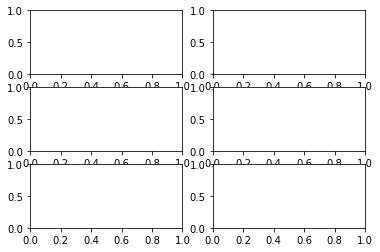

In [43]:
#making subplots
fig, ax = plt.subplots(3,2)

In [ ]:
#import data , index dates
# c = pd.read_csv("filename",parse_dates = ["dates column"],index_col = "dates column")

In [ ]:
#can index by dates 
#seventies = climate_change["1970-01-01":"1979-12-31"]

#seventies.index -> will get you the x axis/dates information

In [ ]:
#to use shared y axis on a graph you can use twinx (twin Axes)

#fig, ax = plt.subplots
#plot-timeseries(ax,data.index,data["y1"])

#ax2 = ax.twinx()

#plot_timeseries(ax, data.index, data["y2"])

In [ ]:
#annotating 

#ax.annotate(">1 degree", xy =[pd.Timestamp("2015-10-06"),1])

### This week's project:

For Monday's class you will write two functions that work on your dataset (you can use the same dataset or a different one). The first function will do some sort of analysis, manipulation or calculation, the second will be a plotting function. The idea here is that if you had another datafile that was similar, you could use the function to do the operation again easily.

**E.3** Write one or more functions that manipulate your dataset and do some sort of analysis. You will present these to the class on Monday.

In [44]:
#import data 
#importing data 
air_data = pd.read_csv("C:/Users/Pgran/Documents/Python Scripts/Untitled Folder/SARP_mysamples.csv")

In [45]:
air_data

,Can #,Snake can #,Location,State,Box,Date,Time,Altitude (m),Temp. Celsius,Wind Spd (mph),...,3-Ethyltoluene (MS),4-Ethyltoluene (MS),2-Ethyltoluene (MS),"1,3,5-Trimethylbenzene (MS)","1,2,4-Trimethylbenzene (MS)",alpha-Pinene (B/MS),beta-Pinene (B/MS),Unnamed: 113,Box.1,CH4 (ppmv height).1
0,8148,4601,"Santa Ana National Wildlife Refuge, Alamo, Texas",Texas,46,4/21/2020,9:26,27,27,10,...,-888,-888,-888,-888,-888,20,6,NaN,46.0,1.898
1,7208,4616,"Alton, Texas",Texas,46,4/21/2020,16:07,49,31,16,...,-888,-888,-888,-888,-888,5,-888,NaN,46.0,1.943
2,6232,4617,"Santa Ana National Wildlife Refuge, Alamo, Texas",Texas,46,4/25/2020,9:26,27,27,11,...,22,27,24,22,23,11,22,NaN,46.0,1.933
3,8128,4602,"Alton, Texas",Texas,46,4/25/2020,14:45,55,32,11,...,-888,-888,-888,-888,3,8,-888,NaN,46.0,1.930
4,7143,4615,"Santa Ana National Wildlife Refuge, Alamo, Texas",Texas,46,4/27/2020,9:08,27,25,12,...,-888,-888,-888,-888,-888,21,-888,NaN,46.0,1.987
5,6007,4618,"Alton, Texas",Texas,46,4/27/2020,15:16,51,33,17,...,7,11,9,7,12,41,6,NaN,46.0,1.937
6,8026,4603,"Santa Ana National Wildlife Refuge, Alamo, Texas",Texas,46,4/30/2020,9:27,27,26,2,...,-888,-888,-888,-888,-888,6,9,NaN,46.0,1.946
7,7172,4614,"Alton, Texas",Texas,46,4/30/2020,15:26,51,33,7,...,-888,-888,-888,-888,-888,3,-888,NaN,46.0,1.954
8,6608,4619,"Santa Ana National Wildlife Refuge, Alamo, Texas",Texas,46,5/3/2020,9:23,27,27,13,...,3,-888,-888,-888,4,17,6,NaN,46.0,1.917
9,8072,4604,"Alton, Texas",Texas,46,5/3/2020,15:24,51,36,16,...,9,6,5,5,15,5,-888,NaN,46.0,1.899


In [48]:
#split into 2 groups based on location 
air_alton = air_data[air_data["Location"] == "Alton, Texas"]
air_SantaAna = air_data[air_data["Location"] != "Alton, Texas"]

In [50]:
air_alton

,Can #,Snake can #,Location,State,Box,Date,Time,Altitude (m),Temp. Celsius,Wind Spd (mph),...,3-Ethyltoluene (MS),4-Ethyltoluene (MS),2-Ethyltoluene (MS),"1,3,5-Trimethylbenzene (MS)","1,2,4-Trimethylbenzene (MS)",alpha-Pinene (B/MS),beta-Pinene (B/MS),Unnamed: 113,Box.1,CH4 (ppmv height).1
1,7208,4616,"Alton, Texas",Texas,46,4/21/2020,16:07,49,31,16,...,-888,-888,-888,-888,-888,5,-888,NaN,46.0,1.943
3,8128,4602,"Alton, Texas",Texas,46,4/25/2020,14:45,55,32,11,...,-888,-888,-888,-888,3,8,-888,NaN,46.0,1.930
5,6007,4618,"Alton, Texas",Texas,46,4/27/2020,15:16,51,33,17,...,7,11,9,7,12,41,6,NaN,46.0,1.937
7,7172,4614,"Alton, Texas",Texas,46,4/30/2020,15:26,51,33,7,...,-888,-888,-888,-888,-888,3,-888,NaN,46.0,1.954
9,8072,4604,"Alton, Texas",Texas,46,5/3/2020,15:24,51,36,16,...,9,6,5,5,15,5,-888,NaN,46.0,1.899
11,6343,4620,"Alton, Texas",Texas,46,5/11/2020,15:21,53,33,16,...,3,-888,-888,-888,6,12,8,NaN,46.0,1.899
13,6295,4621,"Alton, Texas",Texas,46,5/15/2020,15:15,53,34,15,...,-888,-888,-888,-888,3,10,3,NaN,46.0,1.880
15,7244,4611,"Alton, Texas",Texas,46,5/21/2020,15:33,51,33,15,...,-888,-888,-888,-888,4,18,5,NaN,46.0,1.880
17,7047,4610,"Alton, Texas",Texas,46,5/28/2020,15:22,53,33,6,...,14,15,14,12,16,27,6,NaN,46.0,1.878
19,7149,4609,"Alton, Texas",Texas,46,6/2/2020,15:34,53,24,9,...,4,-888,-888,-888,6,8,3,NaN,46.0,1.879


In [75]:
#make a function that will give stats on air concentrations 

# I want to input the gas column, and want the function to return stats
#on the gas conc for the santa ana and the alton sites 
#return a table?
def airdatastats(targetgas):
    
    SAstats = air_SantaAna[targetgas].describe()#stats for Santa Ana Site 
    
    Alstats = air_alton[targetgas].describe() #Stats for Alton Site 
    
    #Turning the stats into a dataframe 
    SAstats = pd.DataFrame(SAstats)
    Alstatss = pd.DataFrame(Alstats)
    
    STATS = SAstats.join(Alstatss, lsuffix = "Santa Ana", rsuffix = "Alton")
    
    return STATS
    

In [76]:
airdatastats("alpha-Pinene (B/MS)")

,alpha-Pinene (B/MS)Santa Ana,alpha-Pinene (B/MS)Alton
count,11.000000,11.000000
mean,19.727273,13.818182
std,8.626597,11.356216
min,6.000000,3.000000
25%,15.000000,6.500000
50%,20.000000,10.000000
75%,21.500000,16.500000
max,36.000000,41.000000


In [78]:
airdatastats("CO (ppbv)")

,CO (ppbv)Santa Ana,CO (ppbv)Alton
count,11.000000,11.000000
mean,156.545455,153.727273
std,85.317482,64.151525
min,86.000000,105.000000
25%,106.000000,114.000000
50%,133.000000,132.000000
75%,163.000000,150.000000
max,378.000000,291.000000


**E.4** If you haven't yet, complete the introductions assignment on slack (add the channel, introduce yourself)